In [4]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.generated.generated_data import get_noisy_nonlinear_with_non_noisy_labels
import common_grid_search_analysis
import SVMs.common_SVM as common_SVM
import TrainingCurves
from sklearn.model_selection import ShuffleSplit

from sklearn import svm

In [9]:
GS_FILE_NAME_PREFIX = "Analysis_Data/NOISY_NONLINEAR_SVM"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "SVM"
DATASET = "Faces"
GLOBAL_FIG_COUNTER = 0

default_title = "{} Default Learning Curve\n Data Set: {}".format(ALGO, DATASET)
final_title = "{} Final Tuning Learning Curve\n Data Set: {}".format(ALGO, DATASET)

In [6]:
# Load Data
X_train, X_test, y_train, y_test, y_test_non_noisy = get_noisy_nonlinear_with_non_noisy_labels()
num_features = X_train.shape[1]

In [7]:
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(svm.SVC(), X_train, y_train, "accuracy")

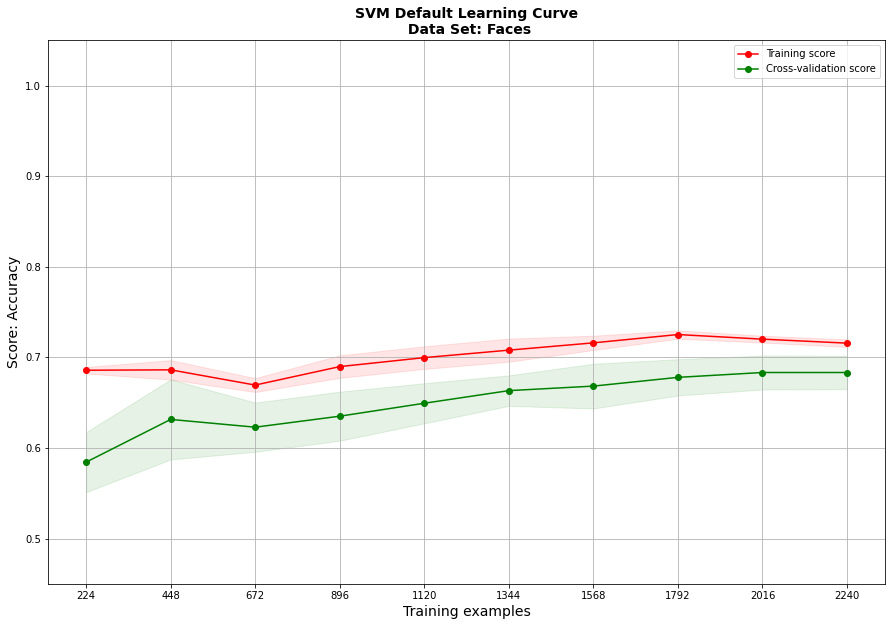

In [8]:

ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, default_title, ylim=ylim)

In [10]:
C = [i for i in range(1, 100, 2)]
gamma = [i for i in range(1, 150, 2)]
kernel = ["linear", "rbf", "poly"]
degree = [3, 4, 5, 6]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.2s finished


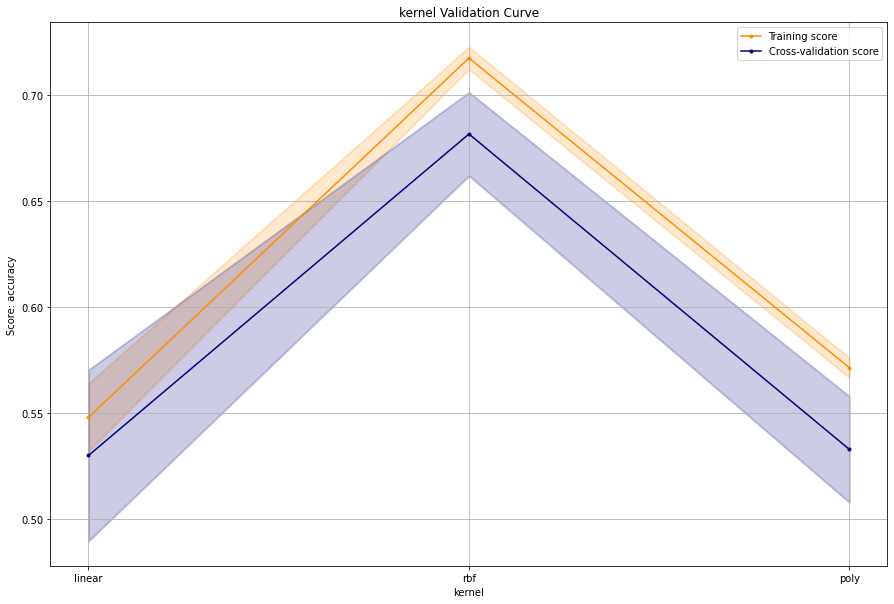

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   11.7s finished


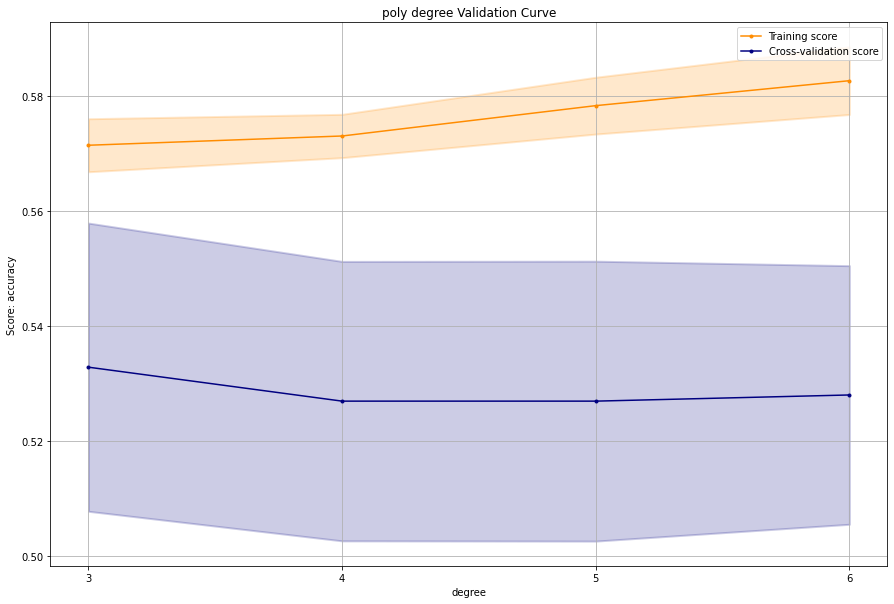

In [9]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(), X_train, y_train, "kernel", kernel, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "kernel", kernel, title="kernel Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(kernel='poly'), X_train, y_train, "degree", degree, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "degree", degree, title="poly degree Validation Curve", scoring="accuracy", tick_spacing=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   42.2s finished


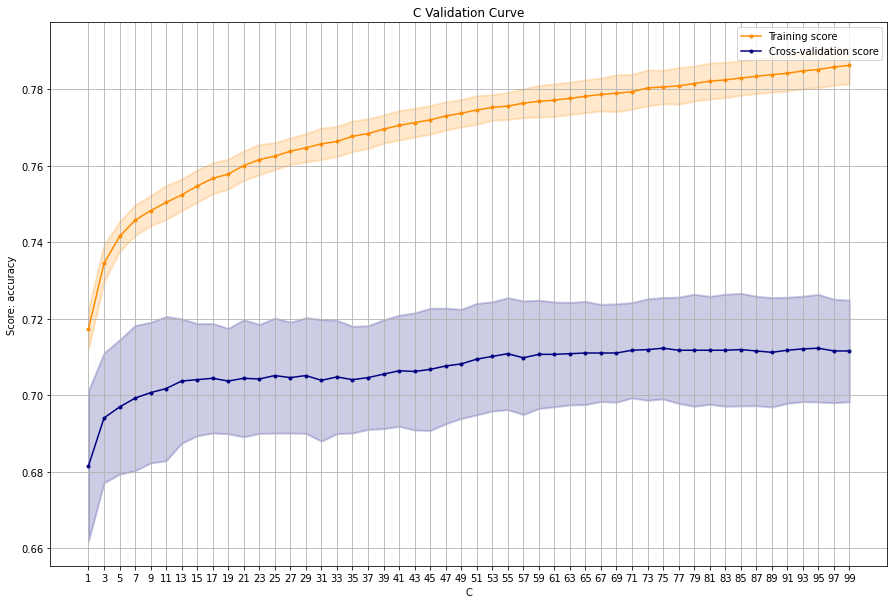

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   57.4s finished


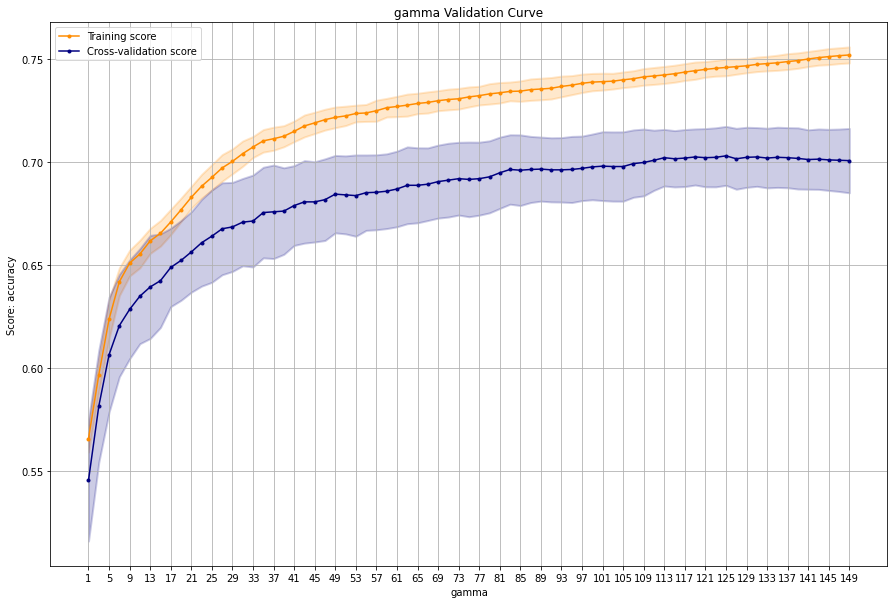

In [10]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(), X_train, y_train, "C", C, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "C", C, title="C Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(), X_train, y_train, "gamma", gamma, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "gamma", gamma, title="gamma Validation Curve", scoring="accuracy", tick_spacing=2)

In [11]:
C = [i for i in range(1, 50, 1)]
gamma = [i for i in range(1, 120, 1)]
kernel = ["linear", "rbf", "poly"]

parameters = {'kernel': kernel, 'C': C, 'gamma': gamma}

gs = common_SVM.perform_grid_search(parameters, X_train, y_train,scoring='accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

NOT performing Grid Search


Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


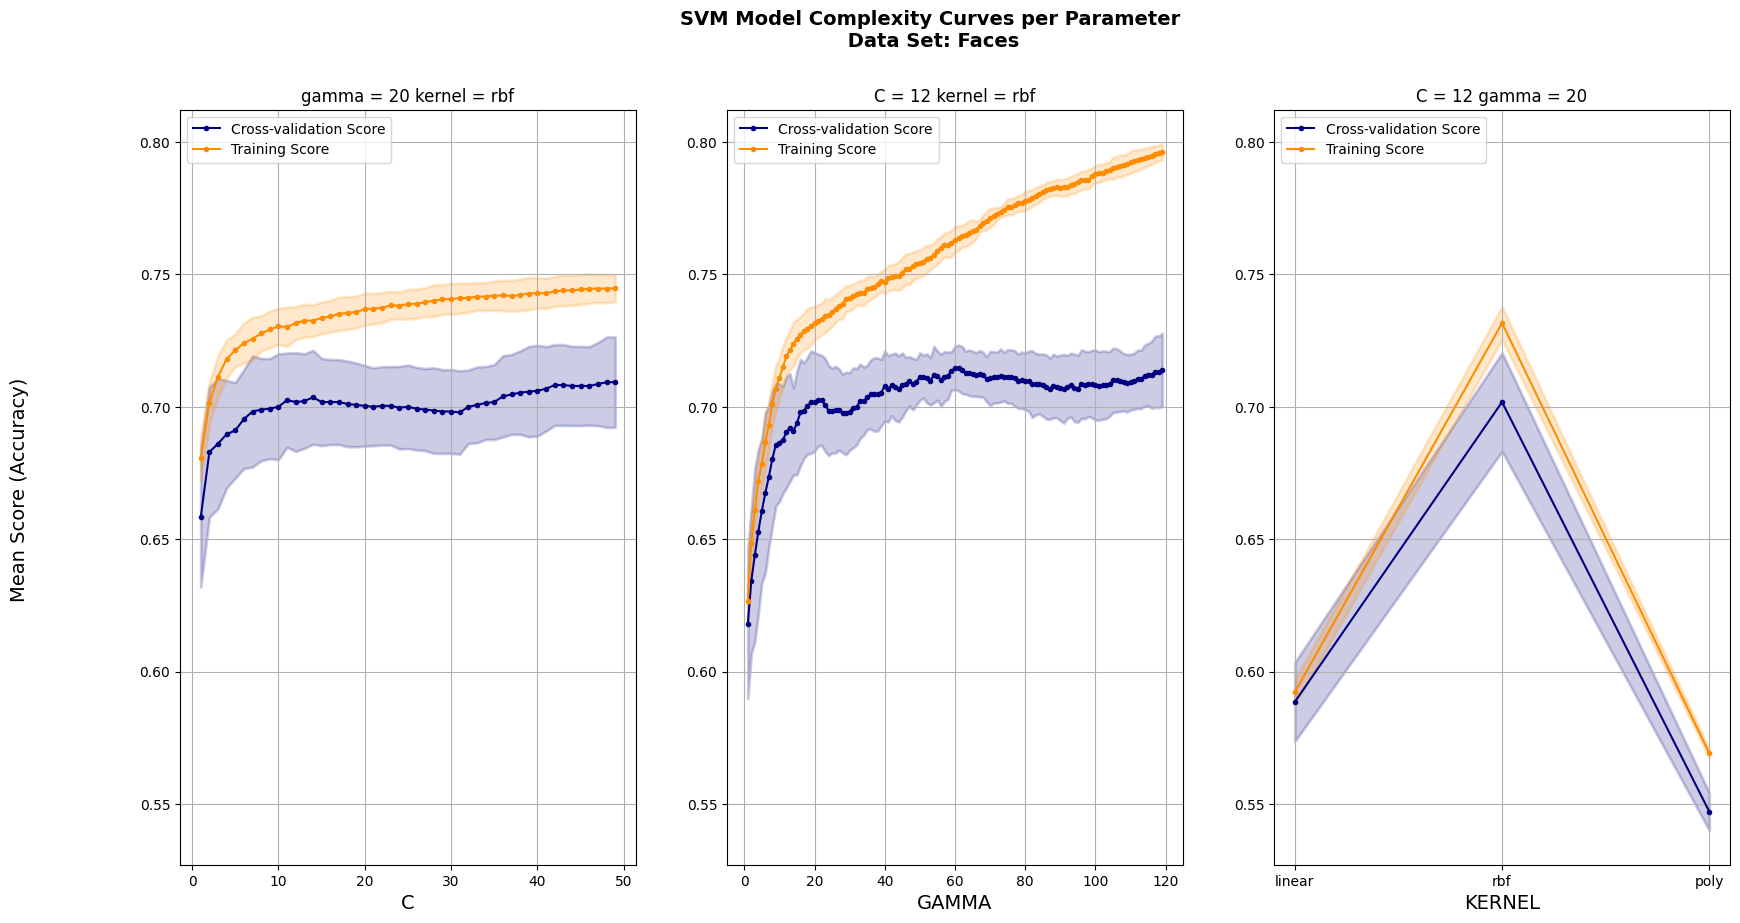

In [31]:
unused_params_values = {'gamma': min(gamma), 'C': min(C), 'kernel': 'rbf'}
unused_params_values = {'kernel': 'rbf', 'gamma':20, 'C':12}
ylim=[0.5, 0.9]
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


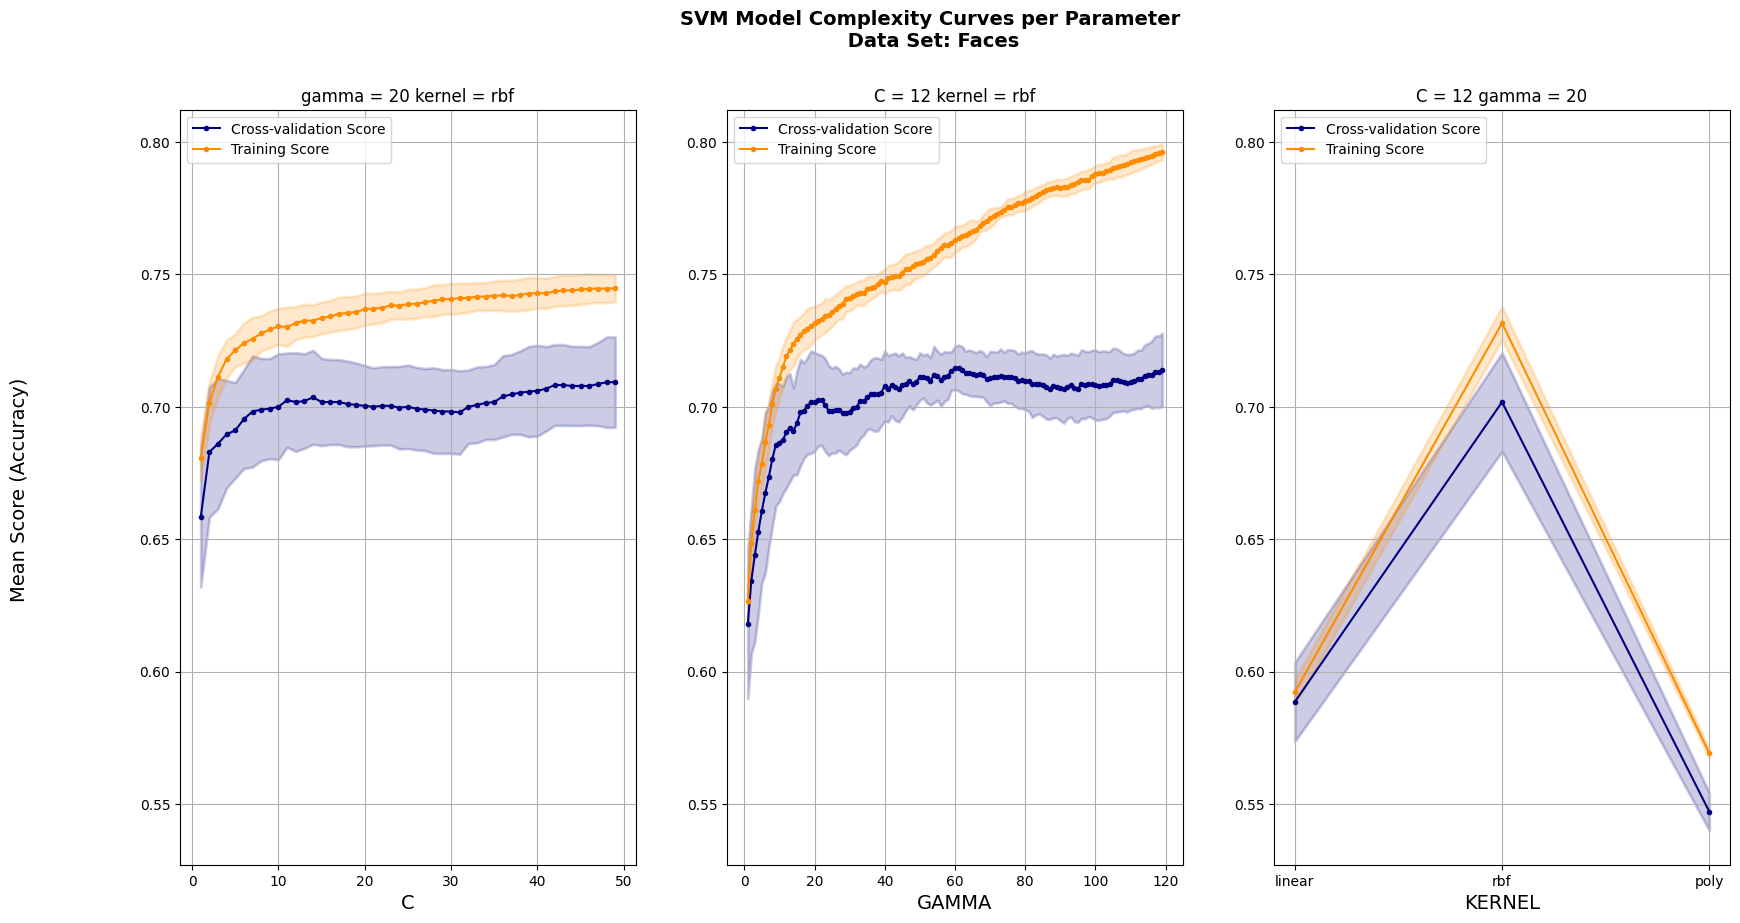

In [32]:
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/Faces_SVM_GS_Times_C_gamma_kernel.png


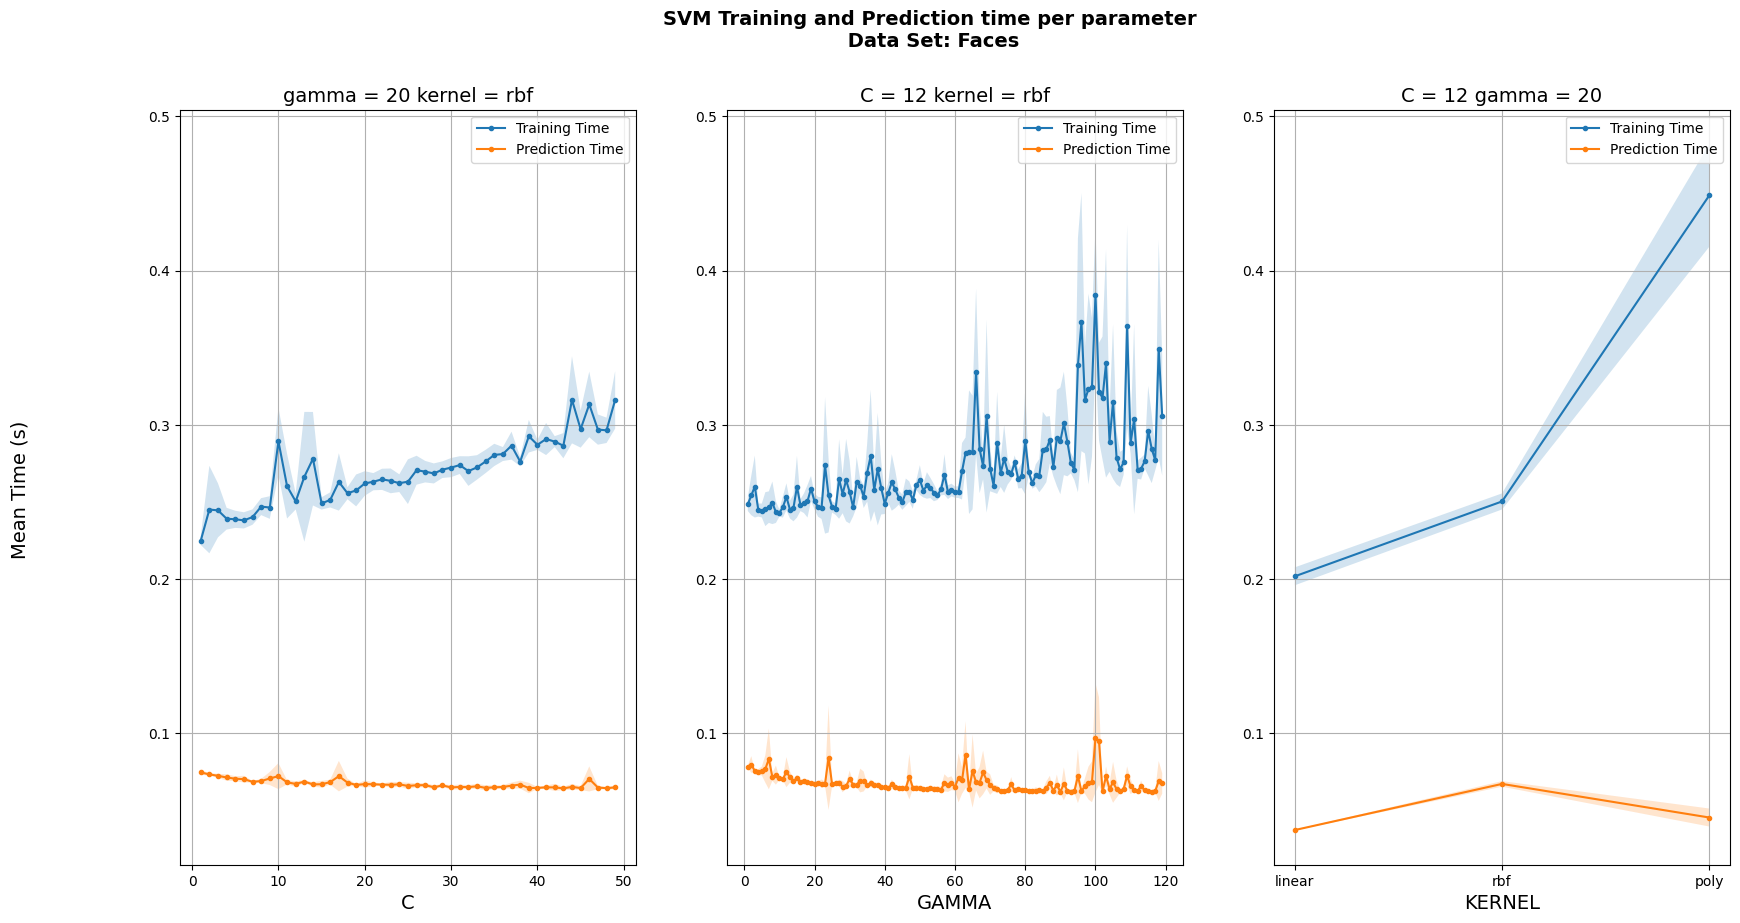

In [33]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


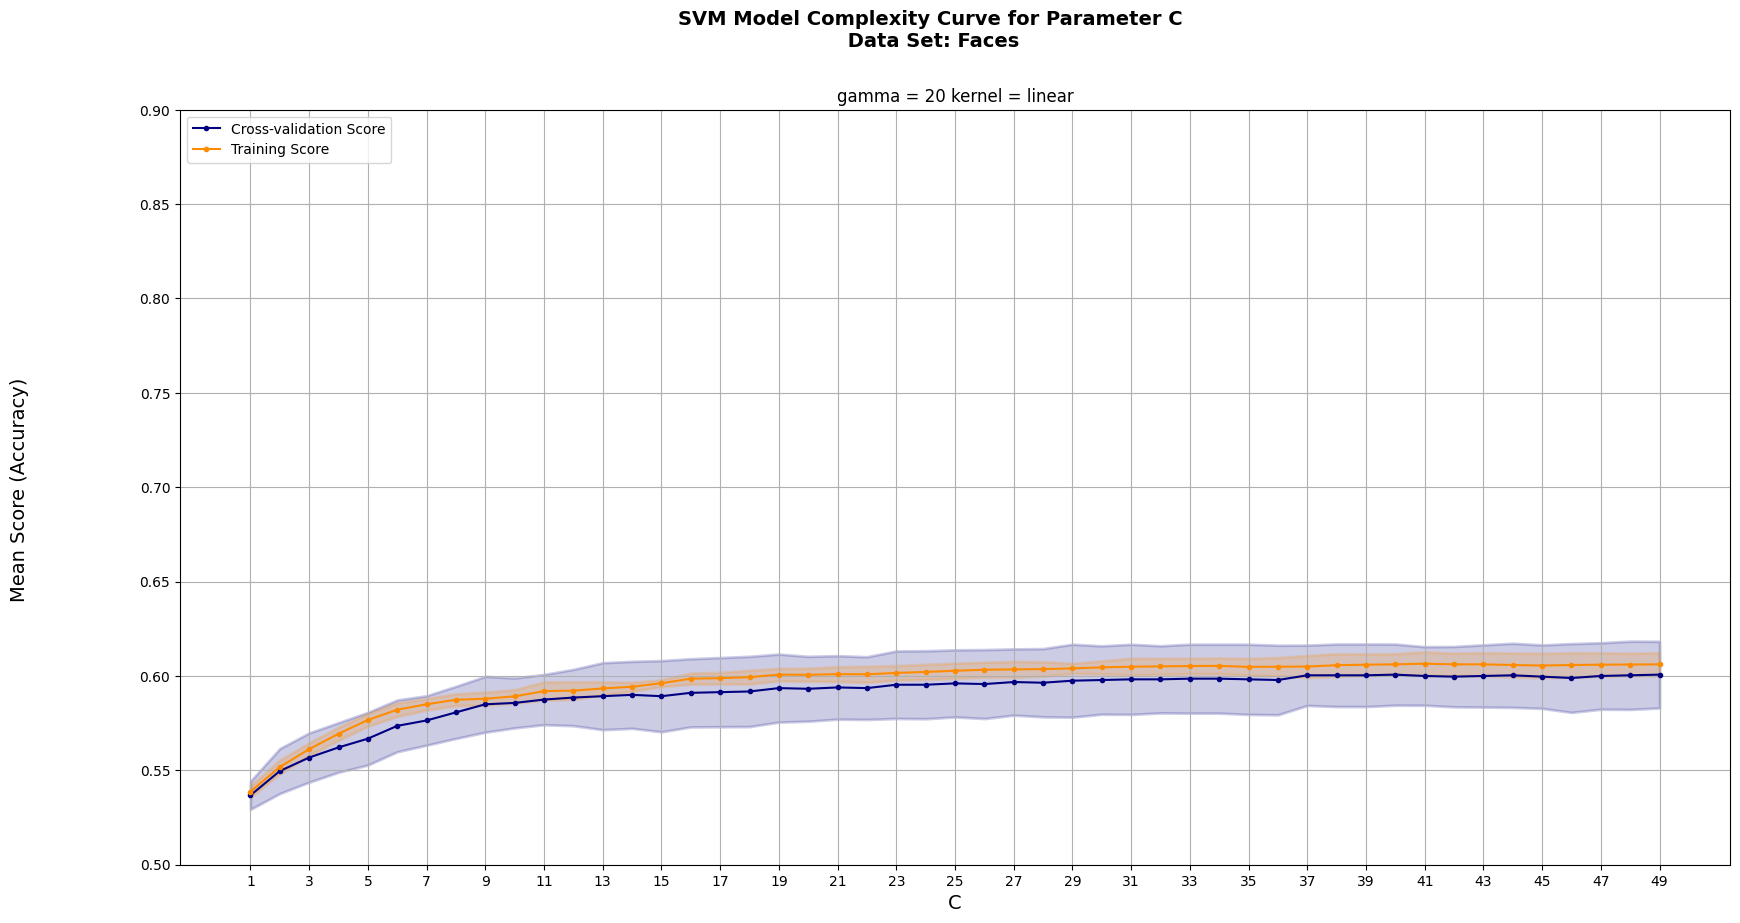

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


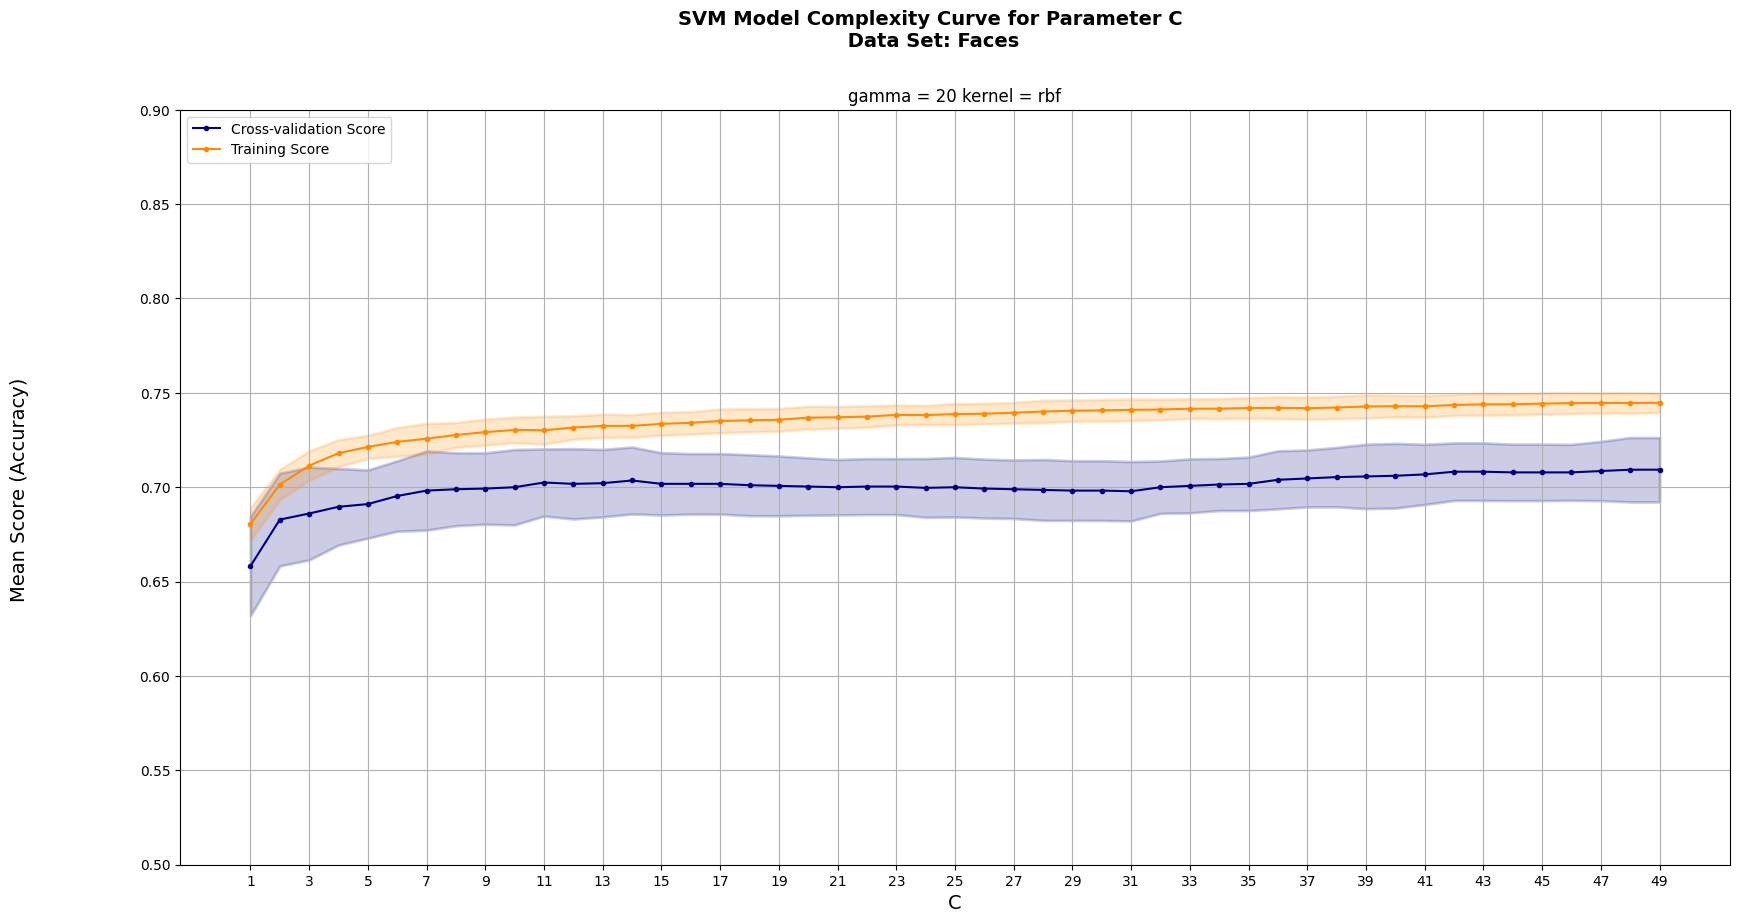

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


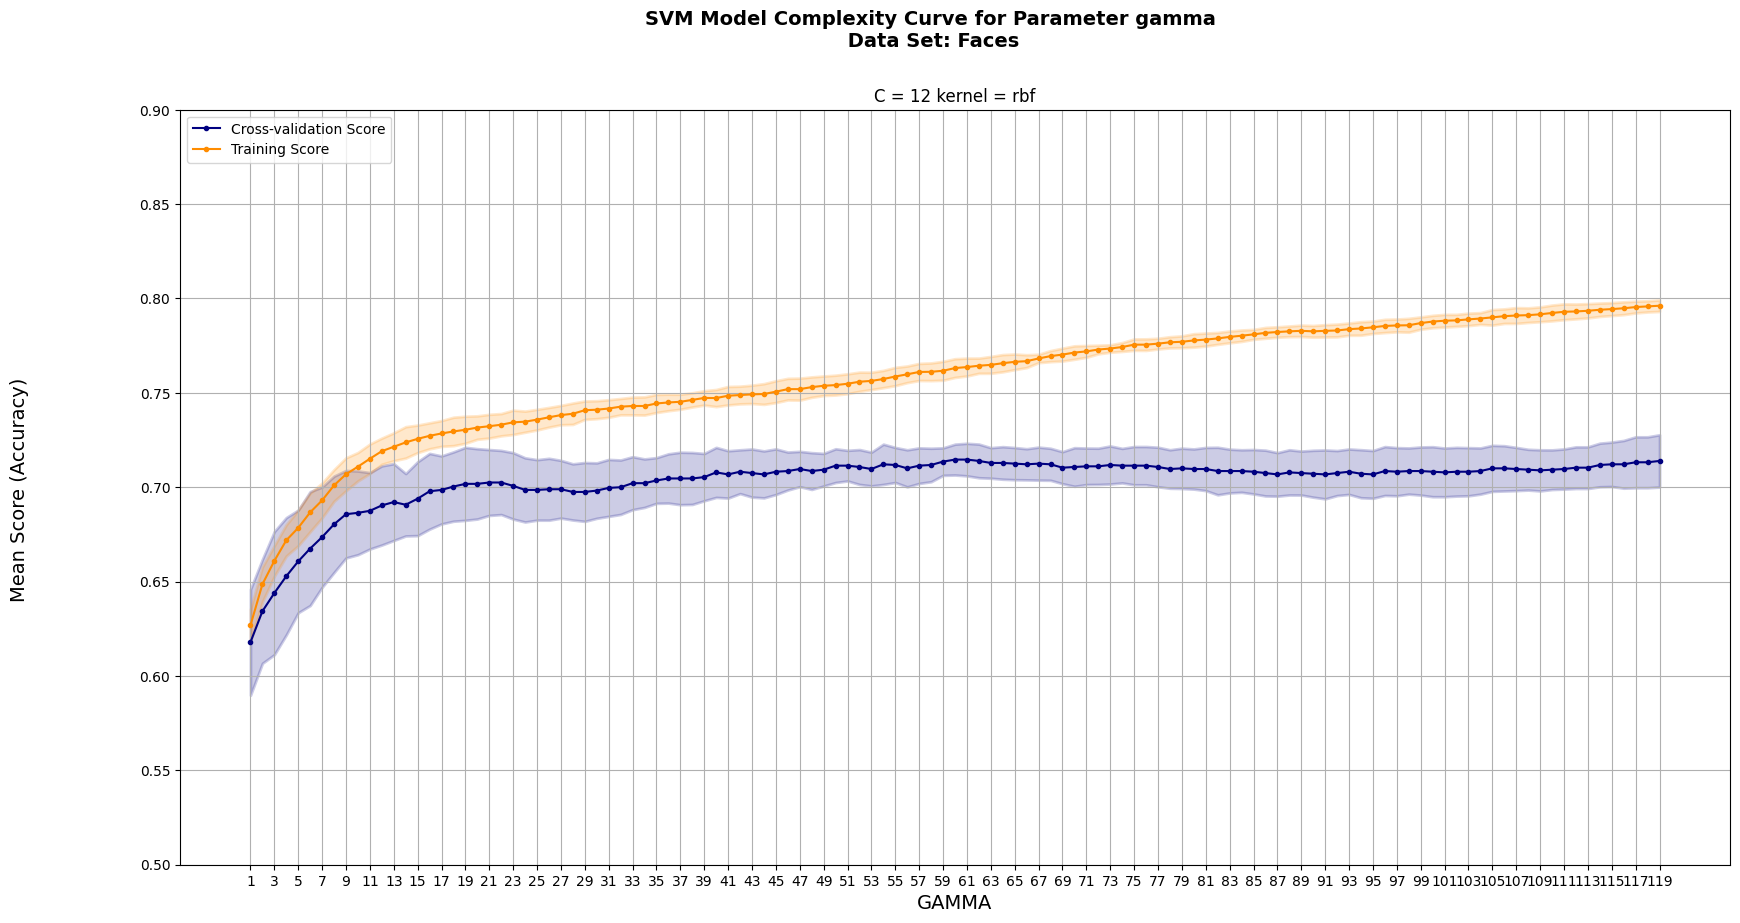

In [34]:
unused_params_values['kernel'] = 'linear'
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'C', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values, tick_spacing=2, ylim=ylim)
unused_params_values['kernel'] = 'rbf'
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'C', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values, tick_spacing=2, ylim=ylim)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'gamma', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values, tick_spacing=2, ylim=ylim)


Plot saved as:  Figures/Faces_SVM_GridScore_C_gamma_1.png


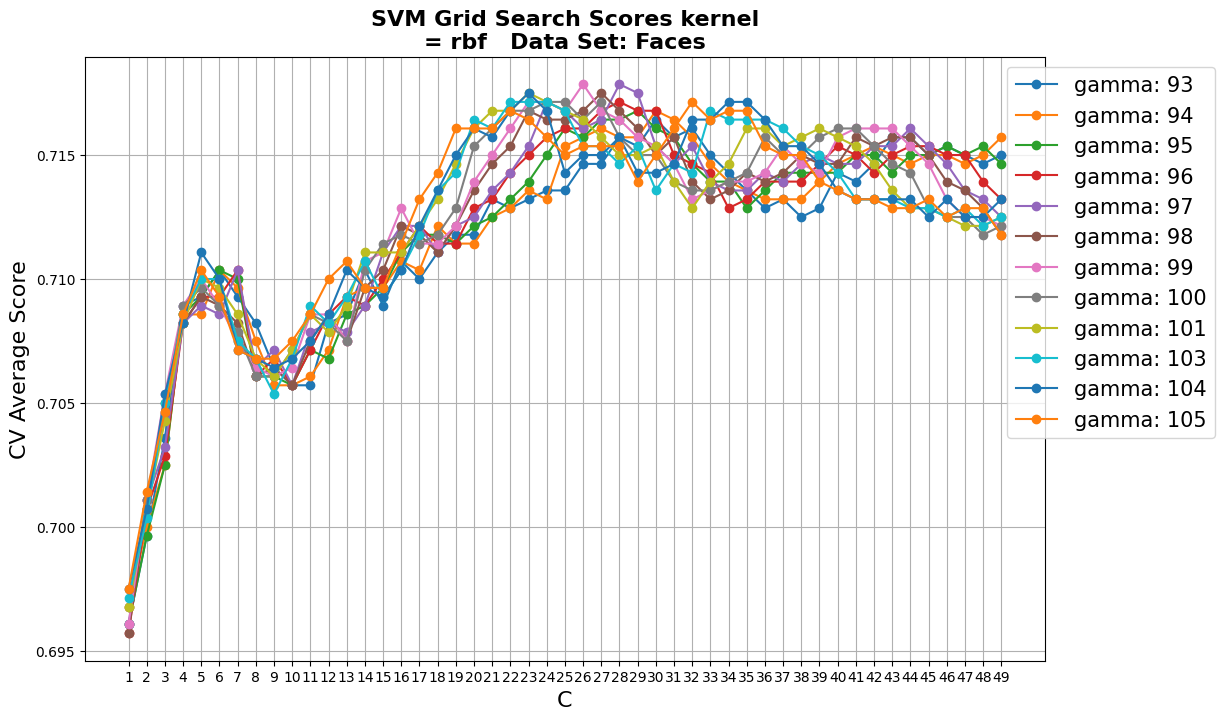

In [35]:
mean_score_limit = 0.713
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'C', 'gamma', mean_score_limit, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, plot_counter=GLOBAL_FIG_COUNTER, tick_spacing=1)
GLOBAL_FIG_COUNTER+=1

In [36]:
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(svm.SVC(**unused_params_values), X_train, y_train, "accuracy")

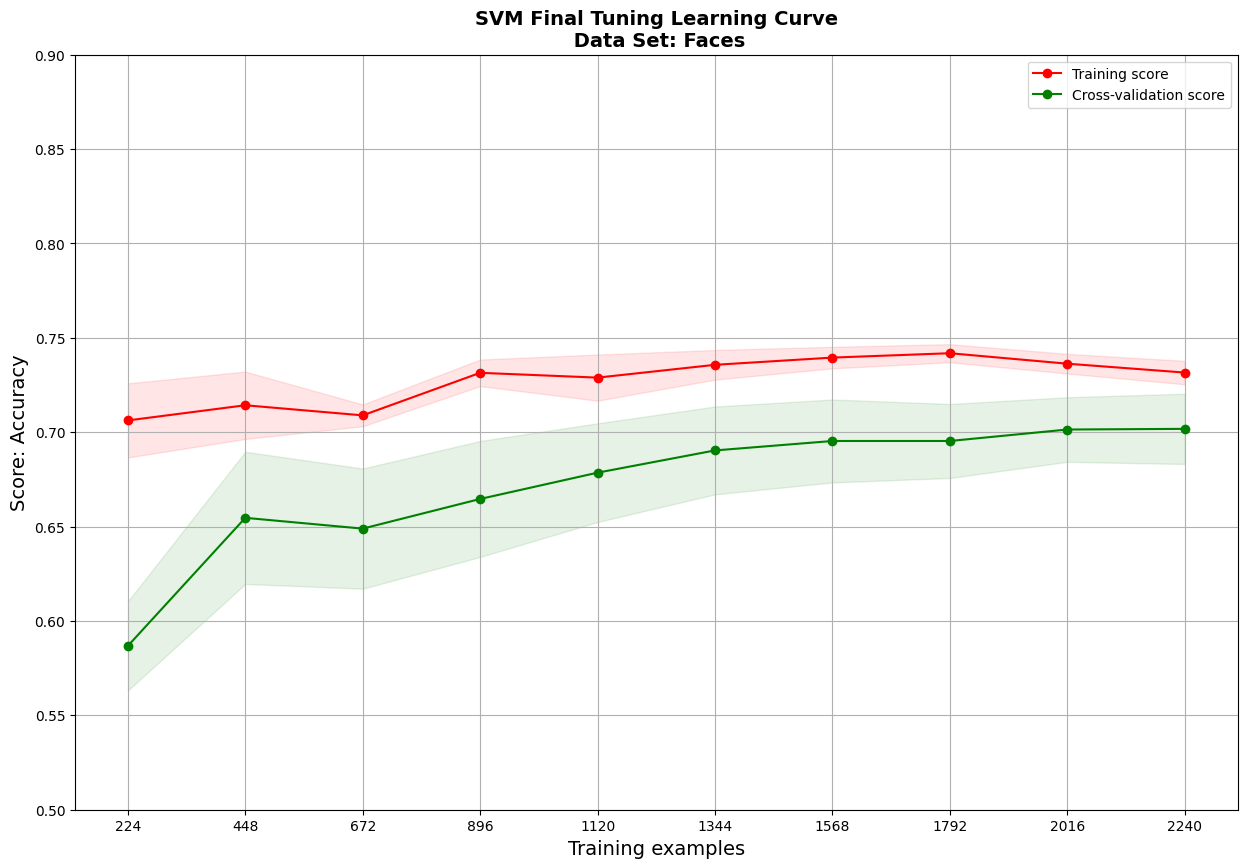

In [37]:
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, final_title, ylim=ylim)

In [28]:
unused_params_values = {'kernel': 'rbf', 'gamma':20, 'C':11}
clf = svm.SVC(**unused_params_values)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7296428571428571
0.6414285714285715


In [29]:
clf.score(X_test, y_test_non_noisy)

0.7357142857142858